# Optional Homework 1: Vector Quantised - Variational AutoEncoder (VQ-VAE)

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchsummary import summary

import matplotlib.pyplot as plt

from model import VQVAE

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## Explore Data

In [3]:
# Define image transformation
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load Fashion MNIST dataset
dataset = datasets.FashionMNIST("../data", download=True, transform=transform)

In [4]:
sample_idx = torch.randint(len(dataset), size=(1,)).item()
img, label = dataset[sample_idx]
print(img.shape)

torch.Size([1, 28, 28])


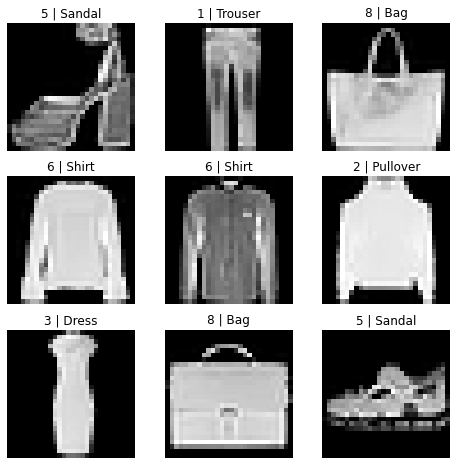

In [5]:
# From https://pytorch.org/tutorials/beginner/basics/data_tutorial.html?highlight=dataloader

# Create label to class dictionary
labels_dict = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Plot images and labels
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{label} | {labels_dict[label]}")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Load Data

In [6]:
# Define training, validation and test ratios
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# Compute training, validation and test datasets sizes
train_size = int(train_ratio * len(dataset))
validation_size = int(validation_ratio * len(dataset))
test_size = len(dataset) - train_size - validation_size

# Create training, validation and test datasets
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])

In [7]:
print(f"Total dataset size: {len(dataset)}")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(validation_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Total dataset size: 60000
Training dataset size: 36000
Validation dataset size: 12000
Test dataset size: 12000


In [8]:
# Create training, validation and test data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## VQ-VAE

> "The encoder consists of 2 strided convolutional layers with stride 2 and window size 4 × 4, followed by two residual
3 × 3 blocks (implemented as ReLU, 3x3 conv, ReLU, 1x1 conv), all having 256 hidden units. The decoder similarly has two residual 3 × 3 blocks, followed by two transposed convolutions with stride 2 and window size 4 × 4. We use the ADAM optimiser [21 ] with learning rate 2e-4 and evaluate the performance after 250,000 steps with batch-size 128" -- [Neural Discrete Representation Learning (Arxiv)](https://arxiv.org/abs/1711.00937)

"In this experiment we show that we can model x = 128 × 128 × 3 images by compressing them to a z = 32 × 32 × 1 discrete space (with K=512) via a purely deconvolutional p(x|z)." -- [Neural Discrete Representation Learning (Arxiv)](https://arxiv.org/abs/1711.00937)

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchsummary import summary

from model import VQVAE

# Instanciate VQ-VAE model
vqvae = VQVAE()

# Print model informations
# summary(vqvae, input_size=torch.Size([1, 28, 28]))

In [ ]:
# Load weights
# checkpoint = torch.load(f"train_res/{id}/checkpoint_best.pth.tar",
#                         weights_only=True, map_location=torch.device("cpu"))
# vqvae.load_state_dict(checkpoint["state_dict"])
# vqvae = vqvae.eval().to(device)

In [ ]:
with torch.no_grad():
    for i, batch in enumerate(test_loader):
        batch, _ = batch # Retrieve only images
        batch = batch.to(device)

        x_recon, z, quantized, loss = vqvae(batch)

        break

torch.Size([64, 1, 28, 28])


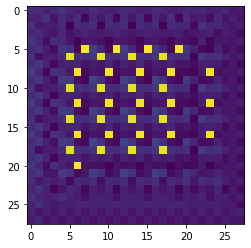

In [16]:
plt.imshow(transforms.ToPILImage()(x_recon[0].squeeze().cpu()))